In [206]:
import os
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [207]:
#csv_path = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\shape vs texture bias\texture_bias_regression_results.csv"
#dataset = "OADS"

csv_path = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\shape vs texture bias\IMAGENET_Texture_results.csv"
dataset = "ImageNet-16"

In [221]:
# Read the csv
df = pd.read_csv(csv_path)


# remove fc layer when necessary
df = df[df['layer'] != 'fc2']


# Filter models, if necessary
selected_models = ["OADSx6", "STL10", "Untrained", "Supervised ResNet18"]
df = df[df['checkpoint'].isin(selected_models)]


In [222]:
# Define colors for whichever models we chose to keep it consistent...

# Dictionary mapping models to colors
model_colors = {
    'OADS': 'orange',
    'OADSx6': 'red',
    'OADSx30': 'purple',
    'STL10': 'yellow',
    'Untrained': 'blue',
    'Supervised ResNet18': 'green'  # Add more colors if needed
}

# Create a custom palette
colors_order = [model_colors[model] for model in df['checkpoint'].unique()]

colors_order

['red', 'yellow', 'blue', 'green']

In [ ]:
"""
title = f"Texture Bias on {dataset} cue conflict"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df, x="layer", y="texture_bias", hue="checkpoint", dodge=True) #palette="pastel",
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Texture bias (%)")
#plt.xlabel("Layer")
plt.legend(title="Checkpoint")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()
"""
# DONT USE TEXTURE BIAS...


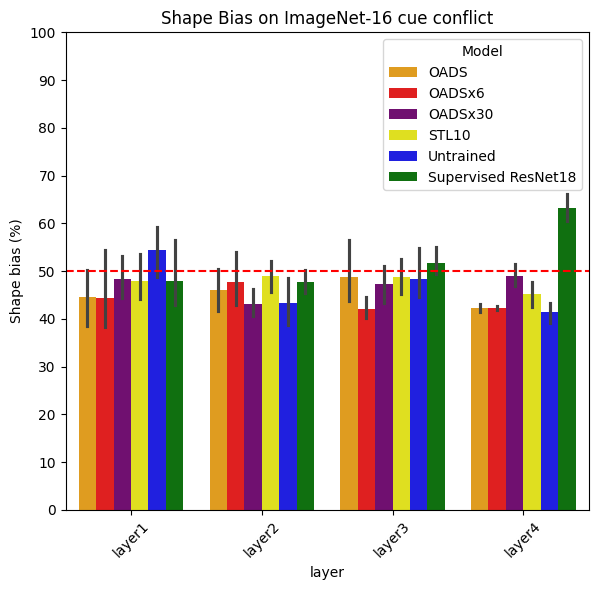

In [215]:
title = f"Shape Bias on {dataset} cue conflict"

plt.figure(figsize=(6, 6))

# plot all layers
g= sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", dodge=True, palette=colors_order)

plt.title(title)
plt.ylabel("Shape bias (%)")
#plt.xlabel("Layer")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


In [21]:
# Layer4 only...

title = f"Shape Bias on {dataset} cue conflict - Layer 4"

plt.figure(figsize=(6, 6))

# Plot one layer
layer4_data = df[df['layer'] == 'layer4']
g= sns.barplot(data=layer4_data, y="shape_bias", hue="checkpoint", dodge=True, palette=colors_order)
plt.xlabel("Layer 4")


plt.title(title)
plt.ylabel("Shape bias (%)")
plt.legend(title="Model", bbox_to_anchor=(1.1, 1), loc='upper left')
#plt.legend().remove()
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


NameError: name 'dataset' is not defined

In [216]:
# Same data as the graph, print the numbers so I can add them to the report...

average_accuracy = df.groupby(['checkpoint', 'layer'])['shape_bias'].mean().reset_index()

print(average_accuracy)

             checkpoint   layer  shape_bias
0                  OADS  layer1   44.492517
1                  OADS  layer2   45.987624
2                  OADS  layer3   48.678838
3                  OADS  layer4   42.348480
4               OADSx30  layer1   48.388638
5               OADSx30  layer2   43.187368
6               OADSx30  layer3   47.200486
7               OADSx30  layer4   48.877558
8                OADSx6  layer1   44.397412
9                OADSx6  layer2   47.764658
10               OADSx6  layer3   42.092842
11               OADSx6  layer4   42.235835
12                STL10  layer1   47.988620
13                STL10  layer2   48.987260
14                STL10  layer3   48.675151
15                STL10  layer4   45.136347
16  Supervised ResNet18  layer1   47.955637
17  Supervised ResNet18  layer2   47.798809
18  Supervised ResNet18  layer3   51.778421
19  Supervised ResNet18  layer4   63.244987
20            Untrained  layer1   54.459927
21            Untrained  layer2 

In [223]:
# Stats - shape bias

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind


#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df['checkpoint'].unique()
#checkpoints = selected_models
layers = df['layer'].unique()

ns_count = 0
s_count = 0

print(dataset)

for layer in layers:    
    # Iterate over combinations of checkpoints for comparison
    for checkpoint1, checkpoint2 in combinations(checkpoints, 2):
        # Filter data for the two checkpoints and current layer
        model1_data = df[(df['checkpoint'] == checkpoint1) & (df['layer'] == layer)]['shape_bias']
        model2_data = df[(df['checkpoint'] == checkpoint2) & (df['layer'] == layer)]['shape_bias']
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(model1_data, model2_data)

        if p_value < 0.05:
            # Print the results if the p-value is significant
            print(f"Comparison between {checkpoint1} and {checkpoint2} for layer {layer}:")
            print("T-statistic:", t_statistic)
            print(f"P-value: {p_value:.6f}")
            print()  # Add a newline for readability
            s_count += 1
        else:
            ns_count += 1
            #print(f"P-value: {p_value:.6f}")

    
    print()

print(f"Significant ones: {s_count}")
print(f"Non-significant ones: {ns_count}")
            

ImageNet-16


Comparison between OADSx6 and STL10 for layer layer3:
T-statistic: -2.4993968729656455
P-value: 0.029538

Comparison between OADSx6 and Supervised ResNet18 for layer layer3:
T-statistic: -4.61946922114002
P-value: 0.001711


Comparison between OADSx6 and Supervised ResNet18 for layer layer4:
T-statistic: -12.22200518612574
P-value: 0.000002

Comparison between STL10 and Supervised ResNet18 for layer layer4:
T-statistic: -7.951566252439932
P-value: 0.000007

Comparison between Untrained and Supervised ResNet18 for layer layer4:
T-statistic: -10.656884888863837
P-value: 0.000005


Significant ones: 5
Non-significant ones: 19


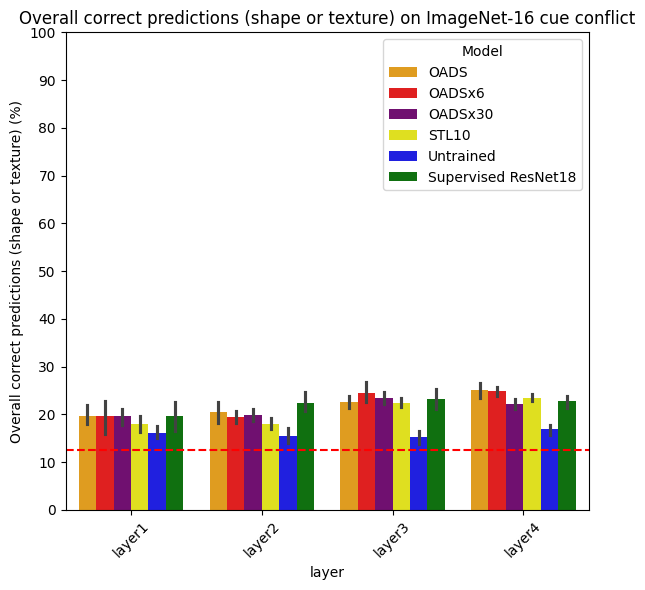

In [220]:
title = f"Overall correct predictions (shape or texture) on {dataset} cue conflict"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df, x="layer", y="overall_correct", hue="checkpoint", dodge=True, palette=colors_order)
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Overall correct predictions (shape or texture) (%)")
#plt.xlabel("Layer")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=12.5, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


In [149]:
# Same data as the graph, print the numbers so I can add them to the report...

average_accuracy = df.groupby(['checkpoint', 'layer'])['overall_correct'].mean().reset_index()

print(average_accuracy)

             checkpoint   layer  overall_correct
0                OADSx6  layer1        28.125000
1                OADSx6  layer2        31.250000
2                OADSx6  layer3        37.979167
3                OADSx6  layer4        36.145833
4                 STL10  layer1        21.475694
5                 STL10  layer2        30.520833
6                 STL10  layer3        29.670139
7                 STL10  layer4        31.111111
8   Supervised ResNet18  layer1        25.937500
9   Supervised ResNet18  layer2        33.333333
10  Supervised ResNet18  layer3        40.694444
11  Supervised ResNet18  layer4        53.784722
12            Untrained  layer1        24.244792
13            Untrained  layer2        23.046875
14            Untrained  layer3        22.682292
15            Untrained  layer4        22.786458


In [150]:
# Stats - overall accuracy

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind


#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df['checkpoint'].unique()
#checkpoints = selected_models
layers = df['layer'].unique()

ns_count = 0
s_count = 0

for layer in layers:    
    # Iterate over combinations of checkpoints for comparison
    for checkpoint1, checkpoint2 in combinations(checkpoints, 2):
        # Filter data for the two checkpoints and current layer
        model1_data = df[(df['checkpoint'] == checkpoint1) & (df['layer'] == layer)]['overall_correct']
        model2_data = df[(df['checkpoint'] == checkpoint2) & (df['layer'] == layer)]['overall_correct']
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(model1_data, model2_data)

        if p_value < 0.05:
            # Print the results if the p-value is significant
            print(f"Comparison between {checkpoint1} and {checkpoint2} for layer {layer}:")
            print("T-statistic:", t_statistic)
            print(f"P-value: {p_value:.6f}")
            print()  # Add a newline for readability
            s_count += 1
        else:
            ns_count += 1
            #print(f"P-value: {p_value:.6f}")

    
    print()

print(f"Significant ones: {s_count}")
print(f"Non-significant ones: {ns_count}")
            

Comparison between OADSx6 and STL10 for layer layer1:
T-statistic: 4.487384355758821
P-value: 0.001516

Comparison between OADSx6 and Untrained for layer layer1:
T-statistic: 2.6520901678543156
P-value: 0.032842

Comparison between STL10 and Supervised ResNet18 for layer layer1:
T-statistic: -2.5320750052753147
P-value: 0.029765


Comparison between OADSx6 and Untrained for layer layer2:
T-statistic: 8.768286331335482
P-value: 0.000051

Comparison between STL10 and Untrained for layer layer2:
T-statistic: 3.7618119921375412
P-value: 0.005530

Comparison between Untrained and Supervised ResNet18 for layer layer2:
T-statistic: -4.786340725311158
P-value: 0.001379


Comparison between OADSx6 and STL10 for layer layer3:
T-statistic: 13.397971123518595
P-value: 0.000000

Comparison between OADSx6 and Untrained for layer layer3:
T-statistic: 14.608221656093585
P-value: 0.000002

Comparison between STL10 and Untrained for layer layer3:
T-statistic: 7.472023458518044
P-value: 0.000071

Compari

In [19]:
# Same but for object classification

import os
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#csv_path_oc = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\imagenet_obj_class_accuracies.csv"
#dataset_oc = "ImageNet-16"

csv_path_oc = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\object_classification_accuracies.csv"
dataset_oc = "OADS"

# Read the csv
df_oc = pd.read_csv(csv_path_oc)


# Filter models
#selected_models = ["OADS", "OADSx6", "OADSx30"]
#selected_models = ["OADSx6", "STL10", "Untrained", "Supervised ResNet18"]
#df_oc = df_oc[df_oc['checkpoint'].isin(selected_models)]

# Remove the fc layer if necessary
df_oc = df_oc[df_oc['layer'] != 'fc2']


# Define colors for whichever models we chose to keep it consistent...
model_colors = {
    'OADS': 'orange',
    'OADSx6': 'red',
    'OADSx30': 'purple',
    'STL10': 'yellow',
    'Untrained': 'blue',
    'Supervised ResNet18': 'green'  # Add more colors if needed
}
# Create a custom palette
colors_order = [model_colors[model] for model in df_oc['checkpoint'].unique()]

colors_order



['orange', 'red', 'purple', 'yellow', 'blue', 'green']

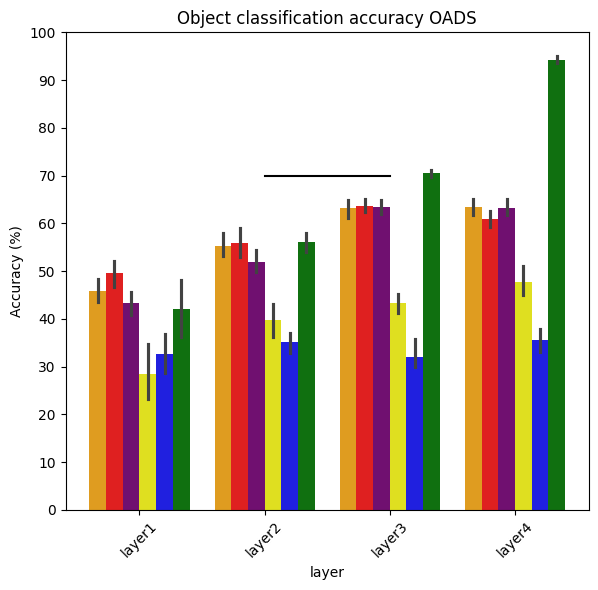

In [26]:
#Plot classification accuracies...

title = f"Object classification accuracy {dataset_oc}"

# Plot
plt.figure(figsize=(6, 6))

# Plot individual layers:
g= sns.barplot(data=df_oc, x="layer", y="accuracy", hue="checkpoint", dodge=True, palette=colors_order)

# Plot one layer instead
#layer4_data = df_oc[df_oc['layer'] == 'layer4']
#g= sns.barplot(data=layer4_data, y="accuracy", hue="checkpoint", dodge=True, palette=colors_order)

# Add stuff
plt.title(title)
plt.ylabel("Accuracy (%)")
#plt.xlabel("Layer")
plt.legend(title="Model")
#plt.legend(title="Model", bbox_to_anchor=(1.1, 1), loc='upper left')
plt.legend().remove()
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
#plt.axhline(y=6.25, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


#plt.plot([1,2], [70, 70], color='k')


plt.show()

In [48]:
# Same data as the graph, print the numbers so I can add them to the report...

average_accuracy = df_oc.groupby(['checkpoint', 'layer'])['accuracy'].mean().reset_index()

print(average_accuracy)

             checkpoint   layer   accuracy
0                OADSx6     fc2  42.411348
1                OADSx6  layer1  23.687943
2                OADSx6  layer2  30.543735
3                OADSx6  layer3  39.527187
4                OADSx6  layer4  44.397163
5                 STL10     fc2  47.565012
6                 STL10  layer1  19.574468
7                 STL10  layer2  21.040189
8                 STL10  layer3  28.132388
9                 STL10  layer4  31.583924
10  Supervised ResNet18  layer1  20.425532
11  Supervised ResNet18  layer2  27.848700
12  Supervised ResNet18  layer3  28.416076
13  Supervised ResNet18  layer4  32.482270
14            Untrained     fc2  31.252955
15            Untrained  layer1  17.872340
16            Untrained  layer2  17.588652
17            Untrained  layer3  15.933806
18            Untrained  layer4  16.406619


In [10]:
# Stats

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind

#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df_oc['checkpoint'].unique()
#checkpoints = selected_models
layers = df_oc['layer'].unique()

ns_count = 0
s_count = 0

for layer in layers:    
    # Iterate over combinations of checkpoints for comparison
    for checkpoint1, checkpoint2 in combinations(checkpoints, 2):
        # Filter data for the two checkpoints and current layer
        model1_data = df_oc[(df_oc['checkpoint'] == checkpoint1) & (df_oc['layer'] == layer)]['accuracy']
        model2_data = df_oc[(df_oc['checkpoint'] == checkpoint2) & (df_oc['layer'] == layer)]['accuracy']
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(model1_data, model2_data)
        
        if p_value < 0.05:
            # Print the results if the p-value is significant
            print(f"Comparison between {checkpoint1} and {checkpoint2} for layer {layer}:")
            print("T-statistic:", t_statistic)
            print(f"P-value: {p_value:.6f}")
            print()  # Add a newline for readability
            s_count += 1
        else:
            ns_count += 1
    
    # Print counts for significant and non-significant comparisons for each layer
    print()

print(f"Significant ones: {s_count}")
print(f"Non-significant ones: {ns_count}")
            

Comparison between OADSx6 and STL10 for layer layer1:
T-statistic: 5.9227072811731585
P-value: 0.000353

Comparison between OADSx6 and Untrained for layer layer1:
T-statistic: 5.989475199880597
P-value: 0.000327

Comparison between STL10 and Supervised ResNet18 for layer layer1:
T-statistic: -2.8962880463423923
P-value: 0.020005


Comparison between OADSx6 and STL10 for layer layer2:
T-statistic: 5.988396037068204
P-value: 0.000328

Comparison between OADSx6 and Untrained for layer layer2:
T-statistic: 9.742958676414165
P-value: 0.000010

Comparison between STL10 and Supervised ResNet18 for layer layer2:
T-statistic: -6.976532089799345
P-value: 0.000115

Comparison between Untrained and Supervised ResNet18 for layer layer2:
T-statistic: -12.635056108191323
P-value: 0.000001


Comparison between OADSx6 and STL10 for layer layer3:
T-statistic: 14.129714689593081
P-value: 0.000001

Comparison between OADSx6 and Untrained for layer layer3:
T-statistic: 15.69387682316921
P-value: 0.000000

